### Primeiro, importamos as bibliotecas

In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

In [239]:
#Import to ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Definimos a classe do Perceptron para modularizar o código

In [240]:
class Perceptron:
    #Alpha:  Taxa de aprendizagem
    #Ephocs: Número de iterações(épocas)
    def __init__(self, alpha = 0.01, ephocs = 10):
        self.alpha = alpha
        self.ephocs = ephocs

    #Método para treinar a classe
    #X: Conjunto de dados
    #y: Rótulosdo dataset
    def fit(self, X, y):
        self.w = np.zeros(1 + X.shape[1])
        self.e = []

        for _ in range(self.ephocs):
            error = 0
            for xi, target in zip(X, y):
                update = self.alpha * (target - self.predict(xi))
                self.w[1:] += update * xi
                self.w[0] += update
                error += int(update != 0.0)
            self.e.append(error)

    #Método que calcula o prouto entre os pesos e os inputs
    #Retorna 1 caso o valor seja >= 0 e -1 caso contrário
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    
    #Método que retorna o produto escalar entre o vetor de entradas(xi) e o velor de pesos somado com o bias
    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]

### Definimos os dados

In [241]:
#Baixando e organizando o dataset (Iris Dataset) em um dataframe
df = pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/iris/iris.data', header= None)
#100 primeiros valores do dataframe
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

#Características que serão utilizadas
X = df.iloc[0:100, [0,2]].values

df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


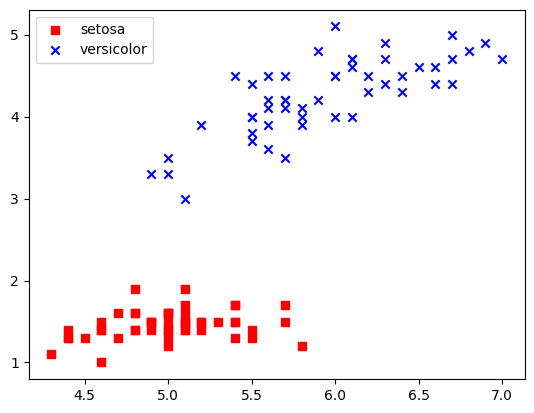

In [242]:
#Plot com os dados do dataset
plt.scatter(X[:50,0], X[:50,1], color='red', marker='s', label= 'setosa')
plt.scatter(X[50:100,0], X[50:100,1],color='blue', marker='x', label= 'versicolor')
plt.legend(loc ='upper left')

### Criamos o objeto para treino e em seguida plotamos o resultado

In [243]:
#Estanciando a classe do Perceptron e executando o treinamento
perceptron = Perceptron(0.1, 10)
perceptron.fit(X,y)

In [244]:
#Função para calcular e plotar o resultado
def result(X, y, classifier, step=0.02):

    marker  = ('s','x','o','^','v')
    color = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(color[:len(np.unique(y))])

    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, step), np.arange(x2_min, x2_max, step))

    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, z, alpha = 0.2, cmap=cmap)

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y = X[y == cl, 1], c=cmap(idx), marker=marker[idx], label = cl)

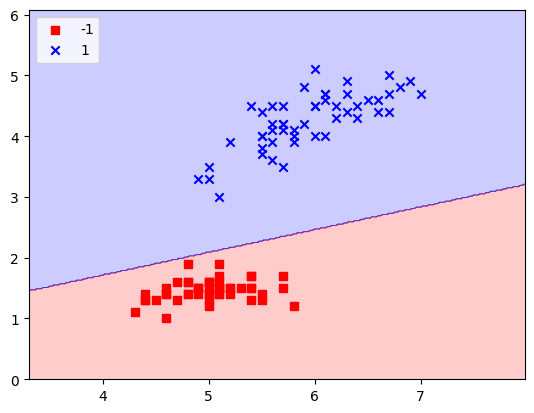

In [245]:
#Plot do resultado
result(X, y, perceptron)
plt.legend(loc='upper left')
plt.show()